In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy import loadtxt
from linear_regression import *
import matplotlib.pyplot as plt
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "y",
          "axes.facecolor" : "None",
          "text.color" : 'w'}
plt.rcParams.update(params)

# <center><font color=slate>Linear Regression</font></center>
## <center><font color=tomato>1. A simple MATLAB function</font></center>
The first part of this script gives you practice with Python syntax and the homework submission process.
In the file `warmUpExercise.py`, you will find the outline of a Python function.
Modify it to return a 5 x 5 identity matrix by filling in the following code:

When you are finished, save `warmUpExercise.py`, then run the code contained in this section to call `eye()`.

In [2]:
from warmUpExercise import eye
eye(num=4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## <center><font color=tomato>2. Linear regression with one variable</font></center>
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck.
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next.

The file `ex1data1.txt` contains the dataset for our linear regression problem.
The first column is the population of a city and the second column is the profit of a food truck in that city.
A negative value for profit indicates a loss.
This script has already been set up to load this data for you.

### <font color=lightGreen>2.1 Plotting the data</font>
Before starting on any task, it is often useful to understand the data by visualizing it.
For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).
Many other problems that you will encounter in real life are multi-dimensional and can't be plotted on a 2-d plot.

Run the code below to load the dataset from the data file into the variables X and y:


In [3]:
data = loadtxt("data/ex1data1.txt", delimiter=",", dtype='f')
X = data[:, 0]; y = data[:, 1]

Now plot the data:

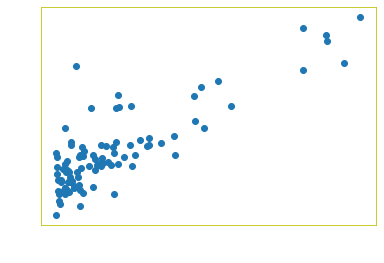

In [4]:
plt.scatter(x=X, y=y)
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s');

### <font color=lightGreen>2.2. Gradient Descent</font>
In this section, you will fit the linear regression parameters to our dataset using gradient descent.

### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function
<center>

$$J(\theta)=\frac{1}{2m} \sum_{i=0}^m (h_\theta(x^{(i)})-y^{(i)})^2$$</center>

where the hypothesis  is given by the linear model
<center>

$$h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$</center>

Recall that the parameters of your model are the  values.
These are the values you will adjust to minimize cost .
One way to do this is to use the batch gradient descent algorithm.
In batch gradient descent, each iteration performs the update
<center>

$$θ_j := θ_j -⍺ \frac{1}{m} \sum_{i=0}^m (h_θ(x^{(i)})-y^{(i)}) x^{(i)}_j$$ (simultaneously update $θ$ for all $j$)</center>

With each step of gradient descent, your parameters $j$ come closer to the optimal values that will achieve the lowest cost $J(θ)$

<font color=mediumTurquoise>Implementation Note:</font> We store each example as a row in the the X matrix.
To take into account the intercept term $(θ_0)$, we add an additional first column to X and set it to all ones.
This allows us to treat $θ_0$ as simply another 'feature'.

In [5]:
m = len(X) # number of training examples

In [6]:
X = np.hstack((np.ones([m, 1]), data[:,[0]]))
y = data[:,[1]]
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

### 2.2.3 Computing the cost $J(θ)$
As you perform gradient descent to minimize the cost function  $J(θ)$, it is helpful to monitor the convergence by computing the cost.
In this section, you will implement a function to calculate  $J(θ)$ so you can check the convergence of your gradient descent implementation.

Your next task is to complete the code in the file `computeCost.py`, which is a function that computes  $J(θ)$. As you are doing this,
remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set.

Once you have completed the function definition, run this section.
The code below will call `computeCost()` once using $θ$ initialized to zeros, and you will see the cost printed to the screen.
You should expect to see a cost of `32.07` for the first output below:

In [7]:
compute_cost(X=X, y=y, theta=theta)

array([32.07273422])

Next we call computeCost again, this time with non-zero theta values as an additional test.
You should expect to see an output of `54.24` below:

In [8]:
compute_cost(X=X, y=y, theta=[[-1],[2]])

array([54.24245302])

### 2.2.4 Gradient descent
Next, you will implement gradient descent in the function `gradientDescent()`.

As you program, make sure you understand what you are trying to optimize and what is being updated.
Keep in mind that the cost $J(θ)$ is parameterized by the vector $θ$, not $X$ and $y$.
That is, we minimize the value of $J(θ)$ by changing the values of the vector $θ$, not by changing $X$ or $y$.

A good way to verify that gradient descent is working correctly is to look at the value of J and check that it is decreasing with each step.
The starter code for `gradient_descent()` calls `compute_cost()` on every iteration and prints the cost.
Assuming you have implemented gradient descent and computeCost correctly, your value of $J(θ)$ should never increase, and should converge to a steady value by the end of the algorithm.

Your final values for  will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

In [9]:
theta = np.zeros((2, 1))

Run gradient descent:
Compute theta

In [10]:
theta, _ = gradient_descent(X=X, y=y, theta=theta, alpha=alpha, iterations=iterations)

In [11]:
print(f'Theta computed from gradient descent {float(theta[0])}, {float(theta[1])}')

Theta computed from gradient descent -3.6302917109721378, 1.1663623935167555


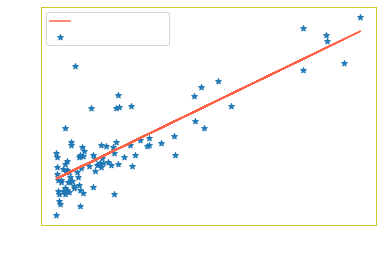

In [12]:
plt.scatter(x=X[:,1], y=y, marker='*', label='Training data')
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')
plt.plot(X[:,1], X @ theta, label='Linear regression', color='tomato')
plt.legend();

Predict values for population sizes of 35,000 and 70,000

In [13]:
predict1 = [1, 3.5] @ theta
print(f'For population = 35,000, we predict a profit of {predict1[0]*10000:,.2f}')
predict2 = [1, 7] @ theta
print(f'For population = 70,000, we predict a profit of {predict2[0]*10000:,.2f}')

For population = 35,000, we predict a profit of 4,519.77
For population = 70,000, we predict a profit of 45,342.45


### <font color=lightGreen>2.4 Visualizing  $J(θ)$</font>
To understand the cost function  $J(θ)$ better, you will now plot the cost over a 2-dimensional grid of  and  values.
You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

In the next step, there is code set up to calculate  $J(θ)$ over a grid of values using the `compute_cost()` function that you wrote.


Visualizing J(theta_0, theta_1):

Grid over which we will calculate J

In [14]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

initialize J_vals to a matrix of 0's

In [15]:
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

Fill out J_vals


In [16]:
for i, valuei in enumerate(theta0_vals):
    for j, valuej in enumerate(theta1_vals):
        t = [[valuei],[valuej]]
        J_vals[j][i] = compute_cost(X, y, t)

After the code above is executed, you will have a 2-D array of $J(θ)$ values.
The code below will then use these values to produce surface and contour plots of $J(θ)$ using the surf and contour commands.
Run the code in this section now. The resulting plots should look something like the figure below.

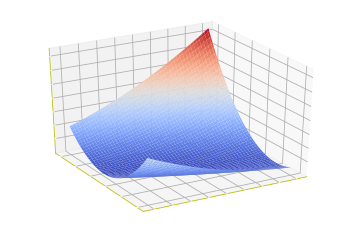

In [17]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(theta0_vals, theta1_vals)
ax.view_init(30, -120)
ax.plot_surface(x, y, J_vals, cmap=cm.coolwarm)
ax.set_title('$J(θ)$')
ax.set_xlabel('$θ_0$')
ax.set_ylabel('$θ_1$')
plt.show()

Contour plot
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100

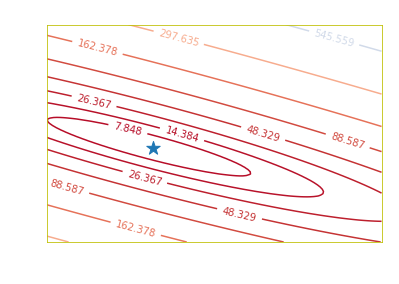

In [18]:
fig, ax = plt.subplots()
CS = ax.contour(x, y, J_vals, np.logspace(-2, 3, 20), cmap=cm.coolwarm_r)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('$J(θ)$')
ax.set_xlabel('$θ_0$')
ax.set_ylabel('$θ_1$')
plt.scatter(x=theta[0], y=theta[1], marker='*', s=200);

## <center><font color=tomato>3. Linear regression with multiple variables</font></center>
In this part, you will implement linear regression with multiple variables to predict the prices of houses.
Suppose you are selling your house and you want to know what a good market price would be.
One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon.
The first column is the size of the house (in square feet),
the second column is the number of bedrooms,
and the third column is the price of the house. Run this section now to preview the data.

In [19]:
data = loadtxt("data/ex1data2.txt", delimiter=",", dtype='i')
X = data[:, :2]; y = data[:, [2]]
m = len(y)

### <font color=lightGreen>3.1 Feature Normalization</font>
This section of the script will start by loading and displaying some values from this dataset.
By looking at the values, note that house sizes are about 1000 times the number of bedrooms.
When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Your task here is to complete the code in feature_normalize():
-   Subtract the mean value of each feature from the dataset.
-   After subtracting the mean, additionally scale (divide) the feature values by their respective "standard deviations".

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within $±2$ standard deviations of the mean);
this is an alternative to taking the range of values $(max - min)$. In Numpy, you can use the std function to compute the standard deviation.
For example, inside `featureNormalize()`, the quantity `X(:,1)` contains all the values of $x_1$ (house sizes) in the training set, so `std(X(:,1))` computes the standard deviation of the house sizes.
At the time that `featureNormalize()` is called, the extra column of 1's corresponding to $x_0 = 1$ has not yet been added to X (see the code below for details)

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples).
Note that each column of the matrix X corresponds to one feature.
When you are finished with `featureNormailize()`, run this section to normalize the features of the housing dataset.

In [20]:
X, mu, sigma = feature_normalization(X)

Now that we have normalized the features, we again add a column of ones corresponding to $θ_0$ to the data matrix X.

In [21]:
X = np.hstack((np.ones([m, 1]), X))

### <font color=lightGreen>3.2 Gradient Descent</font>
Previously, you implemented gradient descent on a univariate regression problem.
The only difference now is that there is one more feature in the matrix X.
The hypothesis function and the batch gradient descent update rule remain unchanged.

You should complete the code in `computeCostMulti()` and `gradientDescentMulti()` to implement the cost function and gradient descent for linear regression with multiple variables.
If your code in the previous part (single variable) already supports multiple variables, you can use it here too.

Make sure your code supports any number of features and is well-vectorized.

Implementation Note: In the multivariate case, the cost function can also be written in the following vectorized form:

$$J(θ) = \frac{1}{2m} (Xθ - \vec{y})^T(Xθ - \vec{y})$$

<table><tr><td>

\begin{equation*}
X =
\begin{vmatrix}
-(x^{(1)})^T- \\
-(x^{(2)})^T- \\
 ⠇ \\
-(x^{(m)})^T- \\
\end{vmatrix}
\end{equation*}

</td><td>

\begin{equation*}
\vec{y} =
\begin{vmatrix}
y^{(1)} \\
y^{(2)} \\
 ⠇ \\
y^{(m)}
\end{vmatrix}
\end{equation*}

</td></tr></table>

In [22]:
theta = np.zeros((3, 1))
alpha = 0.1
num_iters = 400
theta, _ = gradient_descent(X, y, theta, alpha, num_iters)
print(f'Theta computed from gradient descent:{theta[0]},{theta[1]}')

Theta computed from gradient descent:[340412.65957447],[109447.79558639]


Estimate the price of a 1650 sq-ft, 3 br house

In [23]:
x_Norm = ([1650,3] - mu) / sigma
x_Norm = np.hstack((1, x_Norm))
price = x_Norm @ theta
print(f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n${price[0]:,.2f}')

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
$293,081.46


### <font color=lightGreen>3.2.1 Selecting learning rates</font>
In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly.
You can change the learning rate by modifying the code below and changing the part of the code that sets the learning rate.

The code below will call your `gradientDescent()` function and run gradient descent for about 50 iterations at the chosen learning rate.
The function should also return the history of $J(θ)$ values in a vector J.
After the last iteration, the code plots the J values against the number of the iterations.

We recommend trying values of the learning rate on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on).
You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

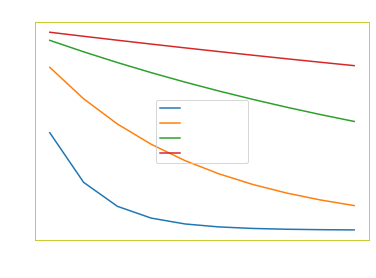

In [24]:
plot_learning_curve(X=X, y=y, num_iters=10)

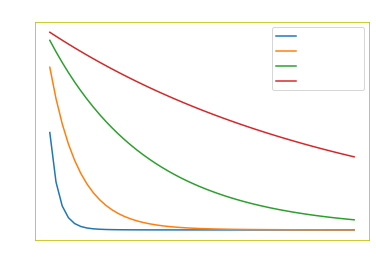

In [25]:
plot_learning_curve(X=X, y=y, num_iters=50)

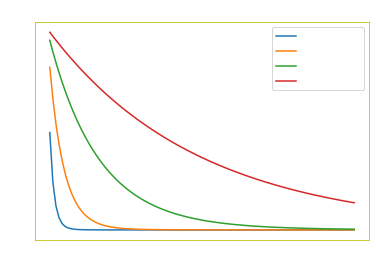

In [26]:
plot_learning_curve(X=X, y=y, num_iters=100)

Notice the changes in the convergence curves as the learning rate changes.
With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value.
Conversely, with a large learning rate, gradient descent might not converge or might even diverge!


## <center><font color=tomato>3.3 Normal Equations</font></center>
In the lecture videos, you learned that the closed-form solution to linear regression is:

$θ = (X^TX)^{-1}X^T \vec{y}$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation:
there is no "loop until convergence" like in gradient descent.

Complete the code in normalEqn.m to use the formula above to calculate θ, then run the code in this section.
Remember that while you don't need to scale your features, we still need to add a column of 1's to the X matrix to have an intercept term $(θ_0)$.

In [27]:
data = loadtxt("data/ex1data2.txt", delimiter=",", dtype='i')
X = data[:, :2]; y = data[:, [2]]
m = len(y)
X = np.hstack((np.ones([m, 1]), X))
# Dividing the formula in two parts
f1 = np.linalg.pinv(X.transpose() @ X)
f2 = X.transpose() @ y
theta = f1 @ f2
print(f'Theta computed from from the normal equations:{theta[0]},{theta[1]}')

Theta computed from from the normal equations:[89597.90954361],[139.21067402]


Now, once you have found  using this method, use it to make a price prediction for a 1650-square-foot house with 3 bedrooms.
You should find that gives the same predicted price as the value you obtained using the model fit with gradient descent (in Section 3.2.1).

In [28]:
price = [1, 1650, 3] @ theta
print(f'Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n${price[0]:,.2f}')

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
$293,081.46
